# Assignment 36

## Numerical Integration of the Lotka-Volterra Equations

We have the following numerical integration problem: 

$$\frac{dx_{1}}{dt} = x_{1}(\alpha - \beta x_{2}) \\ \frac{dx_{2}}{dt} = x_{2}(\gamma + \delta x_{1}) \\ \alpha = \beta = \gamma = \delta = 1$$

The above yield the following update equations:

$$x_{1_{n + 1}} = \Delta t f_{1}(t_{n}, \ x_{1_{n + 1}}, \ x_{2_{n + 1}}) = \Delta t x_{1_{n + 1}}(\alpha - \beta x_{2_{n + 1}})$$

$$x_{2_{n + 1}} = \Delta t f_{2}(t_{n}, \ x_{1_{n + 1}}, \ x_{2_{n + 1}}) = \Delta t x_{2_{n + 1}}(\gamma + \delta x_{1_{n + 1}})$$

We arbitrarily pick initial conditions $x_{1}(t_{0}) = x_{2}(t_{0}) = 10$. 


                             euler


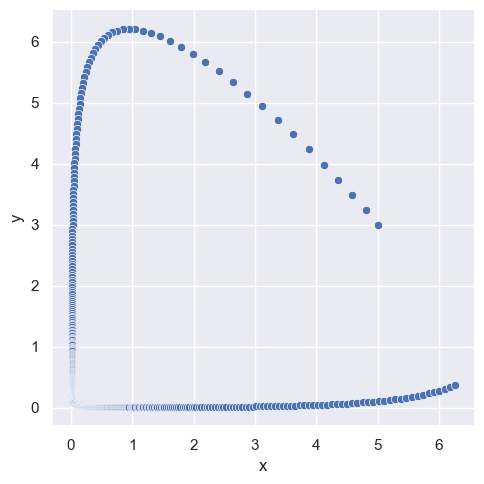


 d*x1 - g*ln(x1) + b*x2 - a*ln(x2) : euler


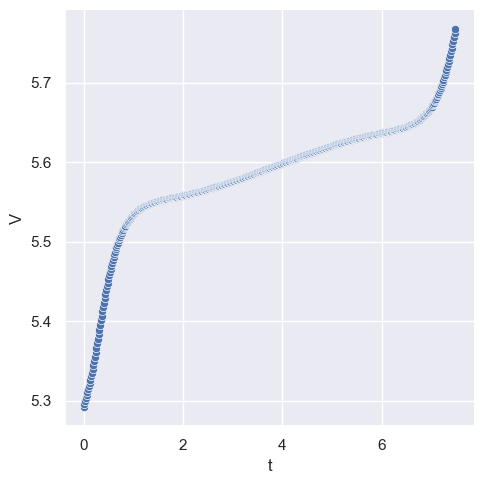


                               heun


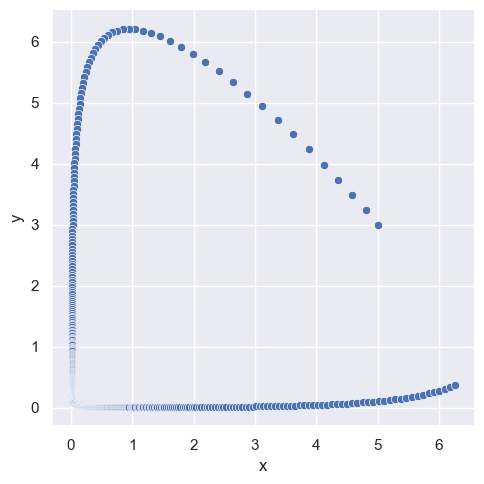


 d*x1 - g*ln(x1) + b*x2 - a*ln(x2) : heun


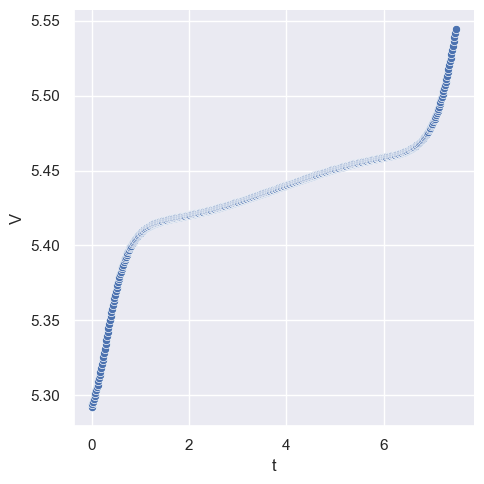


                         runge-kutta


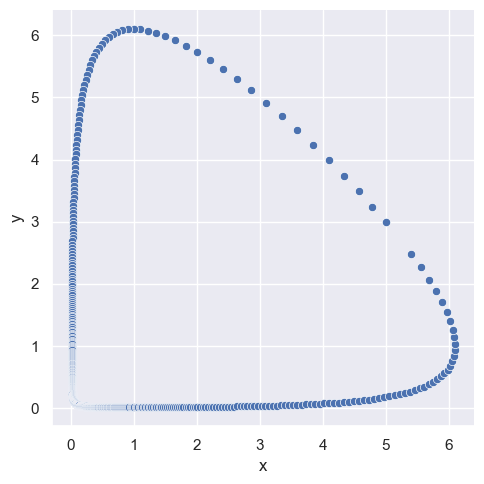


 d*x1 - g*ln(x1) + b*x2 - a*ln(x2) : RK


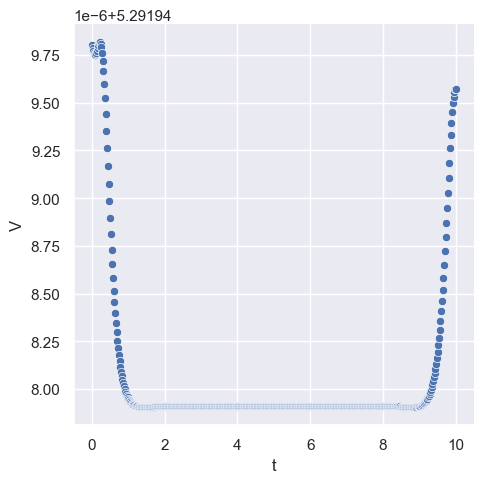

In [1]:
# jupyter nbconvert --to webpdf assignment33.ipynb
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
from tabulate import tabulate


def k(h: float, f: float) -> float:
    return h * f

def heun(k1, k2):
    return 0.5 * (k1 + k2)


def runge_kutta(k1, k2, k3, k4):
    return (1.0 / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)


f1 = lambda x: x[0] * (1 - x[1])
f2 = lambda x: x[1] * (x[0] - 1)

F = [f1, f2]

v = lambda x: x[0] - np.log(x[0]) + x[1] - np.log(x[1])


def solve_euler(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + k(h, F[i](X[t - 1]))
    return X


def solve_heun(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        x = np.array(X[t - 1])
        k1 = np.array([k(h, F[i](x)) for i in range(x.size)])
        k2 = np.array([k(h, F[i](x + 0.5 * k1)) for i in range(len(X0))])
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + heun(k1[i], k2[i])

    return X


def solve_runge_kutta(ti: float, tf: float, intrvls: int, X0: list, F: list) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls):
        x = np.array(X[t - 1])
        k1 = np.array([k(h, F[i](x)) for i in range(x.size)])
        k2 = np.array([k(h, F[i](x + 0.5 * k1)) for i in range(len(X0))])
        k3 = np.array([k(h, F[i](x + 0.5 * k2)) for i in range(len(X0))])
        k4 = np.array([k(h, F[i](x + k3)) for i in range(len(X0))])
        for i in range(len(X0)):
            X[t][i] = X[t - 1][i] + runge_kutta(k1[i], k2[i], k3[i], k4[i])

    return X


table1 = solve_euler(0, 10, 500, [5, 3], F)
xy_euler = [(table1[i][0], table1[i][1]) for i in range(len(table1))]
print("\n                             euler")
fig1 = sns.relplot(data=pd.DataFrame(xy_euler, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

print("\n d*x1 - g*ln(x1) + b*x2 - a*ln(x2) : euler")
V = [v(x) for x in table1]
Vt = list(zip(np.linspace(0, 75, 5000), V))

fig1_1 = sns.relplot(data=pd.DataFrame(Vt, columns=["t", "V"]), x="t", y="V")
plt.show()
plt.close()


table2 = solve_heun(0, 10, 500, [5, 3], F)
xy_heun = [(table2[i][0], table2[i][1]) for i in range(len(table2))]
print("\n                               heun")
fig2 = sns.relplot(data=pd.DataFrame(xy_euler, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

V = [v(x) for x in table2]
Vt = list(zip(np.linspace(0, 75, 5000), V))

print("\n d*x1 - g*ln(x1) + b*x2 - a*ln(x2) : heun")
fig2_1 = sns.relplot(data=pd.DataFrame(Vt, columns=["t", "V"]), x="t", y="V")
plt.show()
plt.close()


table3 = solve_runge_kutta(0, 10, 500, [5, 3], F)
xy_rk = [(table3[i][0], table3[i][1]) for i in range(len(table3))]
print("\n                         runge-kutta")
fig3 = sns.relplot(data=pd.DataFrame(xy_rk, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

V = [v(x) for x in table3]
Vt = list(zip(np.linspace(0, 10, 500), V))

print("\n d*x1 - g*ln(x1) + b*x2 - a*ln(x2) : RK")
fig3_1 = sns.relplot(data=pd.DataFrame(Vt, columns=["t", "V"]), x="t", y="V")
plt.show()
plt.close()